<a href="https://colab.research.google.com/github/chang-ho-jeon/stock_data_anaysis/blob/main/%ED%94%BC%EC%B2%98%EC%97%94%EC%A7%80%EB%8B%88%EC%96%B4%EB%A7%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**한글 폰트 설치**

In [ ]:
!apt-get -qq install fonts-nanum

**필수 모듈 Import 및 한글 설정**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 주요 피처 엔지니어링 기법 (1)

로그 변환

샘플 데이터 생성

In [ ]:
date_rng = pd.date_range(start='2024-10-01', periods=12, freq='D')
data = {
    'Date': date_rng,
    'Close': [10, 100, 1000, 1500, 2000, 3000, 5000, 10000, 15000, 20000, 25000, 30000]
}
df = pd.DataFrame(data)

로그 변환

In [ ]:
df['Log_Close'] = np.log(df['Close'])

print(df[['Date', 'Close', 'Log_Close']])

         Date  Close  Log_Close
0  2024-10-01     10   2.302585
1  2024-10-02    100   4.605170
2  2024-10-03   1000   6.907755
3  2024-10-04   1500   7.313220
4  2024-10-05   2000   7.600902
5  2024-10-06   3000   8.006368
6  2024-10-07   5000   8.517193
7  2024-10-08  10000   9.210340
8  2024-10-09  15000   9.615805
9  2024-10-10  20000   9.903488
10 2024-10-11  25000  10.126631
11 2024-10-12  30000  10.308953


데이터 시각화 (비교)

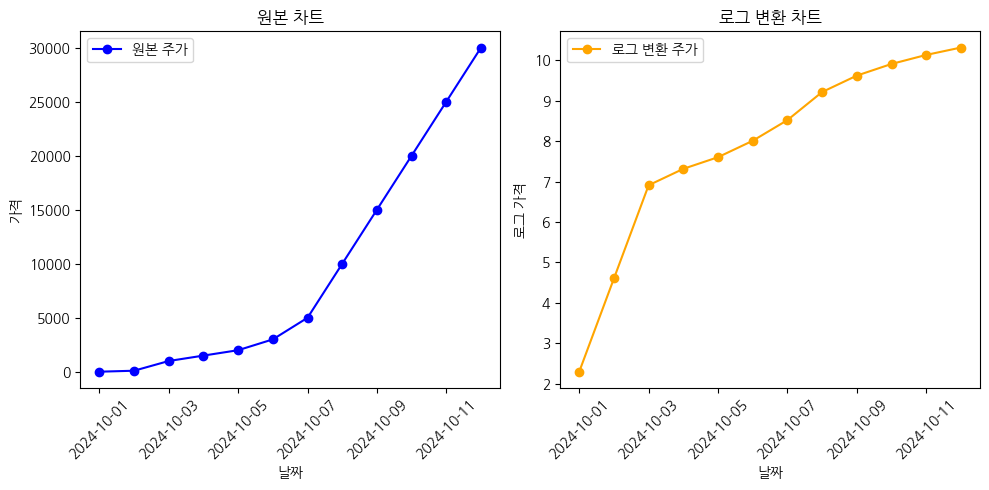

In [ ]:
# 원본 데이터
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Date'], df['Close'], marker='o', color='blue', label='원본 주가')
plt.title('원본 차트')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.xticks(rotation=45)
plt.legend()

# 로그 변환 데이터
plt.subplot(1, 2, 2)
plt.plot(df['Date'], df['Log_Close'], marker='o', color='orange', label='로그 변환 주가')
plt.title('로그 변환 차트')
plt.xlabel('날짜')
plt.ylabel('로그 가격')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


Min-Max / Standard 스케일링

데이터 생성

In [ ]:
min_max_scaler = MinMaxScaler()
df['Min_Max_Scaled'] = min_max_scaler.fit_transform(df[['Close']])

standard_scaler = StandardScaler()
df['Standard_Scaled'] = standard_scaler.fit_transform(df[['Close']])

print(df[['Date', 'Close', 'Min_Max_Scaled', 'Standard_Scaled']])

         Date  Close  Min_Max_Scaled  Standard_Scaled
0  2024-10-01     10        0.000000        -0.924222
1  2024-10-02    100        0.003001        -0.915348
2  2024-10-03   1000        0.033011        -0.826615
3  2024-10-04   1500        0.049683        -0.777319
4  2024-10-05   2000        0.066355        -0.728023
5  2024-10-06   3000        0.099700        -0.629430
6  2024-10-07   5000        0.166389        -0.432246
7  2024-10-08  10000        0.333111         0.060716
8  2024-10-09  15000        0.499833         0.553679
9  2024-10-10  20000        0.666556         1.046641
10 2024-10-11  25000        0.833278         1.539603
11 2024-10-12  30000        1.000000         2.032565


데이터 시각화

<ipython-input-78-7e232b14143d>:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


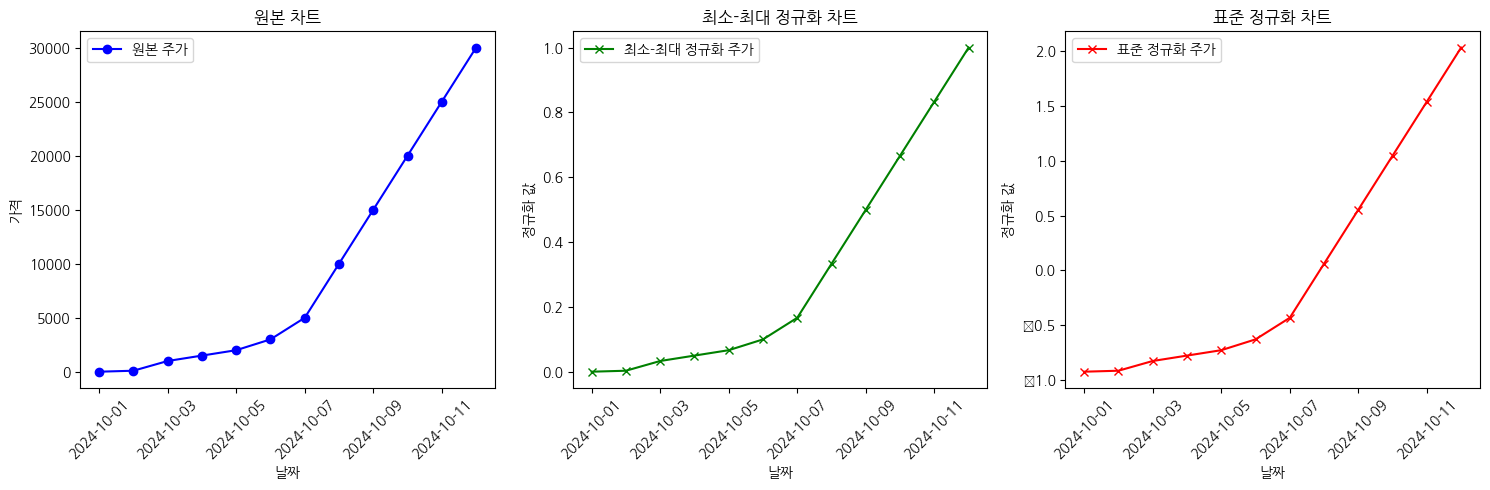

In [ ]:
plt.figure(figsize=(15, 5))

# 원본 데이터
plt.subplot(1, 3, 1)
plt.plot(df['Date'], df['Close'], marker='o', color='blue', label='원본 주가')
plt.title('원본 차트')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.xticks(rotation=45)
plt.legend()

# Min-Max Scaled
plt.subplot(1, 3, 2)
plt.plot(df['Date'], df['Min_Max_Scaled'], marker='x', color='green', label='최소-최대 정규화 주가')
plt.title('최소-최대 정규화 차트')
plt.xlabel('날짜')
plt.ylabel('정규화 값')
plt.xticks(rotation=45)
plt.legend()

# Standard Scaled
plt.subplot(1, 3, 3)
plt.plot(df['Date'], df['Standard_Scaled'], marker='x', color='red', label='표준 정규화 주가')
plt.title('표준 정규화 차트')
plt.xlabel('날짜')
plt.ylabel('정규화 값')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# **주요 피처 엔지니어링 기법 (2)**

비율 변화율 / 이동 평균(5일) 계산 데이터

In [ ]:
df['Percentage_Change'] = df['Close'].pct_change() * 100

df['5_MA'] = df['Close'].rolling(window=5).mean()

print(df[['Date', 'Close', 'Percentage_Change', '5_MA']])

         Date  Close  Percentage_Change     5_MA
0  2024-10-01     10                NaN      NaN
1  2024-10-02    100         900.000000      NaN
2  2024-10-03   1000         900.000000      NaN
3  2024-10-04   1500          50.000000      NaN
4  2024-10-05   2000          33.333333    922.0
5  2024-10-06   3000          50.000000   1520.0
6  2024-10-07   5000          66.666667   2500.0
7  2024-10-08  10000         100.000000   4300.0
8  2024-10-09  15000          50.000000   7000.0
9  2024-10-10  20000          33.333333  10600.0
10 2024-10-11  25000          25.000000  15000.0
11 2024-10-12  30000          20.000000  20000.0


데이터 시각화

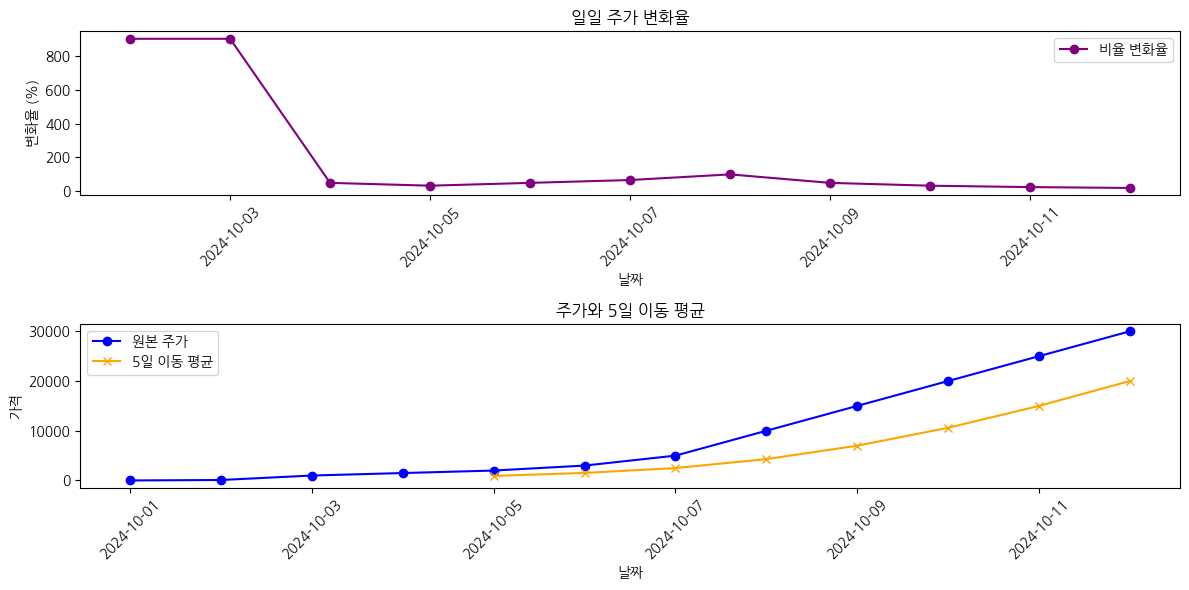

In [ ]:
plt.figure(figsize=(12, 6))

# 비율 변화율
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Percentage_Change'], marker='o', color='purple', label='비율 변화율')
plt.title('일일 주가 변화율')
plt.xlabel('날짜')
plt.ylabel('변화율 (%)')
plt.xticks(rotation=45)
plt.legend()

# 이동 평균
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Close'], marker='o', color='blue', label='원본 주가')
plt.plot(df['Date'], df['5_MA'], marker='x', color='orange', label='5일 이동 평균')
plt.title('주가와 5일 이동 평균')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# **주요 피처 엔지니어링 기법 (3)**

요일별 평균 주가 및 변동성 확인

샘플 데이터 생성

In [ ]:
data = {
    'Date': [
        '2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05', '2024-10-06', '2024-10-07',
        '2024-10-08', '2024-10-09', '2024-10-10', '2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14',
        '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-19', '2024-10-20', '2024-10-21',
        '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-26', '2024-10-27', '2024-10-28',
        '2024-10-29', '2024-10-30', '2024-10-31'
    ],
    'Close': [
        300, 130, 140, 150, 160, 160, 160,
        270, 180, 190, 200, 210, 210, 210,
        320, 230, 240, 250, 260, 260, 260,
        370, 280, 290, 300, 310, 310, 310,
        320, 330, 340
    ]
}

df = pd.DataFrame(data)

데이터 변환

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# 수익률 계산
df['Returns'] = df['Close'].pct_change()

# 날짜/시간 정보 추출
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# 요일별 평균 및 변동성 계산
weekday_summary = df.groupby('Weekday')['Close'].agg(['mean', 'std']).reset_index()
weekday_summary.columns = ['요일', '평균_종가', '변동성']

# 요일 이름 추가 (월, 화, 수, 목, 금, 토, 일)
weekday_summary['요일_이름'] = ['월', '화', '수', '목', '금', '토', '일']

print(weekday_summary[['요일', '평균_종가', '변동성']])


   요일  평균_종가        변동성
0   0  235.0  64.549722
1   1  316.0  36.469165
2   2  230.0  79.056942
3   3  240.0  79.056942
4   4  225.0  64.549722
5   5  235.0  64.549722
6   6  235.0  64.549722


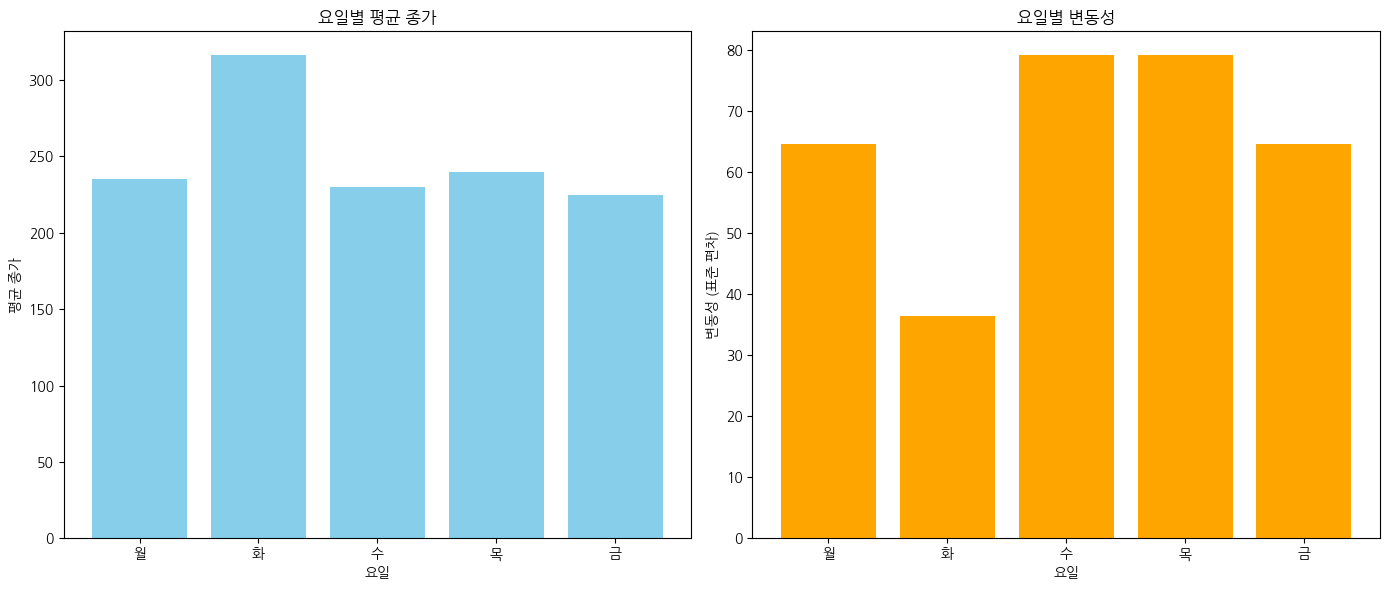

In [ ]:
plt.figure(figsize=(14, 6))

# 요일별 평균 주가
plt.subplot(1, 2, 1)
plt.bar(weekday_summary['요일_이름'][:5], weekday_summary['평균_종가'][:5], color='skyblue')
plt.title('요일별 평균 종가')
plt.xlabel('요일')
plt.ylabel('평균 종가')

# 요일별 변동성
plt.subplot(1, 2, 2)
plt.bar(weekday_summary['요일_이름'][:5], weekday_summary['변동성'][:5], color='orange')
plt.title('요일별 변동성')
plt.xlabel('요일')
plt.ylabel('변동성 (표준 편차)')

plt.tight_layout()
plt.show()


# **주요 피처 엔지니어링 기법 (4)**

샘플 데이터

In [ ]:
data = {
    'Date': [
        '2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
        '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10',
        '2024-01-11', '2024-01-12', '2024-01-13', '2024-01-14', '2024-01-15',
        '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20'
    ],
    'Close': [
        100, 102, 101, 105, 103,
        98, 96, 107, 110, 104,
        108, 109, 106, 111, 115,
        112, 114, 113, 117, 119
    ],
    'Volume': [
        2000, 2200, 2100, 2300, 2400,
        1800, 1900, 2500, 2600, 2700,
        2800, 2750, 2900, 3000, 2950,
        3100, 3200, 3300, 3400, 3500
    ],
    'Region': [
        'North', 'South', 'East', 'West', 'North',
        'South', 'East', 'West', 'North', 'South',
        'East', 'West', 'North', 'South', 'East',
        'West', 'North', 'South', 'East', 'West'
    ],
    'Open': [
        98, 100, 99, 103, 101,
        97, 95, 106, 109, 102,
        107, 108, 105, 110, 114,
        111, 113, 112, 116, 118
    ],
    'High': [
        101, 103, 102, 106, 104,
        99, 98, 108, 111, 106,
        109, 110, 107, 112, 116,
        113, 115, 114, 118, 120
    ],
    'Low': [
        95, 97, 96, 101, 99,
        93, 92, 104, 107, 100,
        104, 105, 102, 107, 111,
        109, 110, 108, 112, 114
    ]
}

df = pd.DataFrame(data)

데이터 생성

In [ ]:
# 상호작용 피처 생성
df['Volume_Close_Interaction'] = df['Volume'] * df['Close']
df['High_Low_Range'] = df['High'] - df['Low']

print(df[['Date', 'Close', 'Volume_Close_Interaction', 'High_Low_Range']])

          Date  Close  Volume_Close_Interaction  High_Low_Range
0   2024-01-01    100                    200000               6
1   2024-01-02    102                    224400               6
2   2024-01-03    101                    212100               6
3   2024-01-04    105                    241500               5
4   2024-01-05    103                    247200               5
5   2024-01-06     98                    176400               6
6   2024-01-07     96                    182400               6
7   2024-01-08    107                    267500               4
8   2024-01-09    110                    286000               4
9   2024-01-10    104                    280800               6
10  2024-01-11    108                    302400               5
11  2024-01-12    109                    299750               5
12  2024-01-13    106                    307400               5
13  2024-01-14    111                    333000               5
14  2024-01-15    115                   

In [ ]:
# 범주형 변수 인코딩 (원-핫 인코딩)
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# 결과 출력
print(df_encoded)

          Date  Close  Volume  Open  High  Low  Volume_Close_Interaction  \
0   2024-01-01    100    2000    98   101   95                    200000   
1   2024-01-02    102    2200   100   103   97                    224400   
2   2024-01-03    101    2100    99   102   96                    212100   
3   2024-01-04    105    2300   103   106  101                    241500   
4   2024-01-05    103    2400   101   104   99                    247200   
5   2024-01-06     98    1800    97    99   93                    176400   
6   2024-01-07     96    1900    95    98   92                    182400   
7   2024-01-08    107    2500   106   108  104                    267500   
8   2024-01-09    110    2600   109   111  107                    286000   
9   2024-01-10    104    2700   102   106  100                    280800   
10  2024-01-11    108    2800   107   109  104                    302400   
11  2024-01-12    109    2750   108   110  105                    299750   
12  2024-01-

In [ ]:
south_data = df_encoded[df_encoded['Region_South'] == 1]

# 결과 출력
print(south_data)

          Date  Close  Volume  Open  High  Low  Volume_Close_Interaction  \
1   2024-01-02    102    2200   100   103   97                    224400   
5   2024-01-06     98    1800    97    99   93                    176400   
9   2024-01-10    104    2700   102   106  100                    280800   
13  2024-01-14    111    3000   110   112  107                    333000   
17  2024-01-18    113    3300   112   114  108                    372900   

    High_Low_Range  Region_North  Region_South  Region_West  
1                6         False          True        False  
5                6         False          True        False  
9                6         False          True        False  
13               5         False          True        False  
17               6         False          True        False  


# **주요 피처 엔지니어링 기법 (5)**

필요 모듈 import

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

중요도 선택 / 주성분 분석

In [ ]:
# 피처와 타겟 분리
X = df_encoded.drop(columns=['Date', 'Close'])
y = df_encoded['Close']

# 중요도 기반 선택 - 랜덤 포레스트 사용
model = RandomForestRegressor()
model.fit(X, y)

# 피처 중요도 출력
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
                    Feature  Importance
2                      High    0.305569
1                      Open    0.270701
3                       Low    0.226443
4  Volume_Close_Interaction    0.106305
0                    Volume    0.079814
5            High_Low_Range    0.006736
8               Region_West    0.002247
7              Region_South    0.001113
6              Region_North    0.001073


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


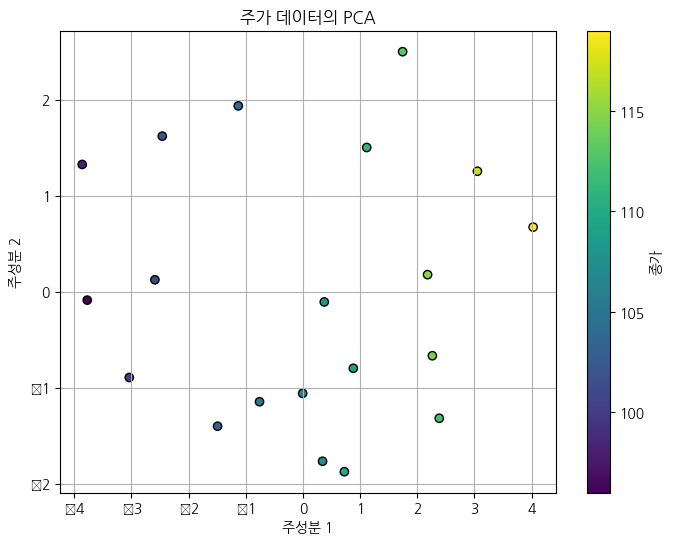

In [ ]:
# 차원 축소 - 주성분 분석 (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # 2차원으로 축소
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('주가 데이터의 PCA')
plt.colorbar(label='종가')
plt.grid()
plt.show()


# **주요 피처 엔지니어링 기법 (6)**

주요 모듈 import

In [ ]:
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

샘플 데이터 생성

In [ ]:
data = {
    'Date': pd.date_range(start='2024-01-01', periods=20, freq='D'),
    'Close': [100, 102, 101, 105, 103, 98, 96, 107, 110, 104,
              108, 109, 106, 111, 115, 112, 114, 113, 117, 119],
    'Volume': [2000, 2200, 2100, 2300, 2400, 1800, 1900, 2500, 2600, 2700,
               2800, 2750, 2900, 3000, 2950, 3100, 3200, 3300, 3400, 3500]
}

df = pd.DataFrame(data)

클러스터링 및 시계열 분석

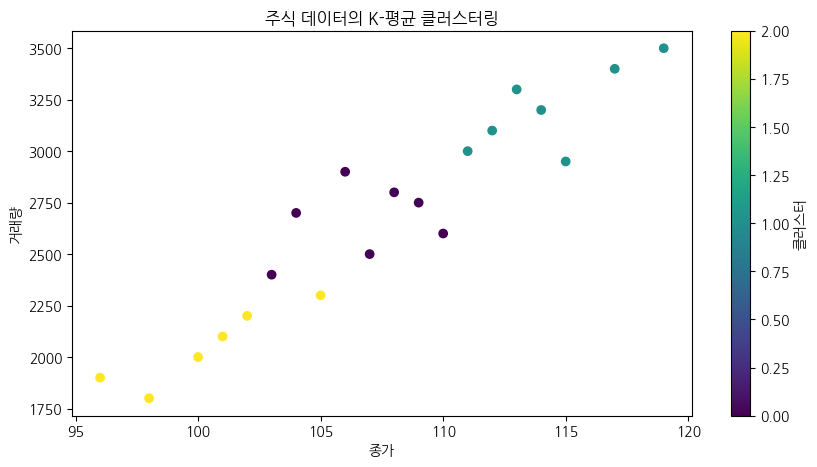

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
<ipython-input-99-8fe261d602f0>:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


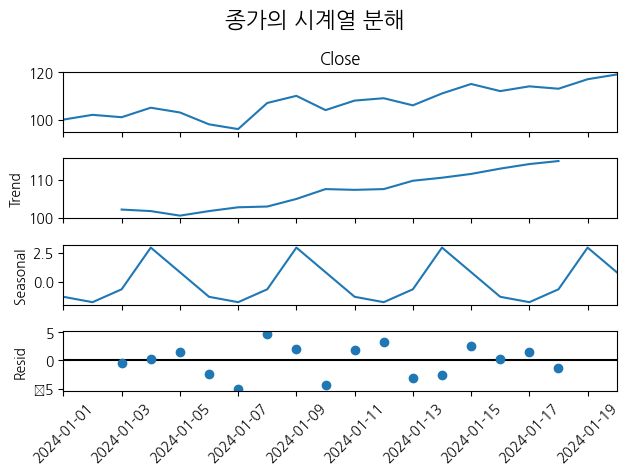

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

# 클러스터링을 위해 필요한 피처 선택
X = df[['Close', 'Volume']]
df['Cluster'] = kmeans.fit_predict(X)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume'], c=df['Cluster'], cmap='viridis')
plt.xlabel('종가')
plt.ylabel('거래량')
plt.title('주식 데이터의 K-평균 클러스터링')
plt.colorbar(label='클러스터')
plt.show()


df.set_index('Date', inplace=True)
decomposition = seasonal_decompose(df['Close'], model='additive', period=5)

# 시계열 분해 결과 시각화
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle('종가의 시계열 분해', fontsize=16)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
